### Decision Tree

In [6]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [7]:
# dataset
data = {
    'Cuaca' : ["Cerah", "Cerah", "Mendung", "Hujan", "Hujan"],
    'Suhu' : ["Panas", "Dingin", "Panas", "Dingin", "Panas"],
    'Bermain' : ["Tidak", "Tidak", "Ya", "Ya", "Ya"]
}


df = pd.DataFrame(data=data)
df

,Cuaca,Suhu,Bermain
0,Cerah,Panas,Tidak
1,Cerah,Dingin,Tidak
2,Mendung,Panas,Ya
3,Hujan,Dingin,Ya
4,Hujan,Panas,Ya


In [9]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding
le_cuaca = LabelEncoder()
le_suhu = LabelEncoder()
le_bermain = LabelEncoder()

In [ ]:
df['Cuaca'] = le_cuaca.fit_transform(df['Cuaca']) #cerah=0, hujan=1, mendung=2
df['Suhu'] = le_suhu.fit_transform(df['Suhu']) #dingin=0, panas=1
df['Bermain'] = le_bermain.fit_transform(df['Bermain']) #tidak=0, ya=1

In [14]:
df

,Cuaca,Suhu,Bermain
0,0,1,0
1,0,0,0
2,2,1,1
3,1,0,1
4,1,1,1


In [20]:
# Memisahkan fitur dan target
x = df[['Cuaca', 'Suhu']]
y = df['Bermain']
x

,Cuaca,Suhu
0,0,1
1,0,0
2,2,1
3,1,0
4,1,1


In [22]:
# Membuat model dan latih

model = DecisionTreeClassifier(criterion='entropy')
model.fit(x, y)

DecisionTreeClassifier(criterion='entropy')

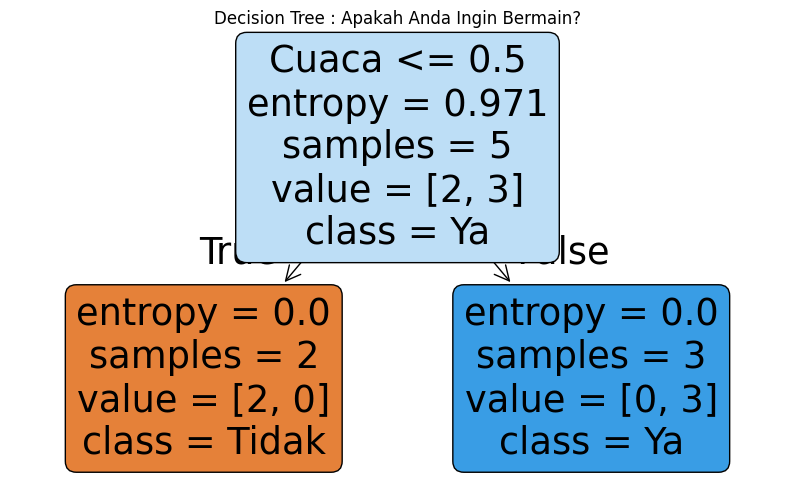

In [27]:
# VISUALISASI
from sklearn import tree
plt.figure(figsize=(10, 6))
tree.plot_tree(model, filled=True, feature_names=['Cuaca', 'Suhu'], class_names=['Tidak', 'Ya'], rounded=True)
plt.title('Decision Tree : Apakah Anda Ingin Bermain?')
plt.show()

In [31]:
data_baru = np.array([[1, 1]]) # Cuaca Cerah, Suhu Dingin
model.predict(data_baru)


d:\python\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

### Menggunakan data real

In [33]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree

In [34]:
iris = load_iris()

# konversi ke DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [35]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [37]:
# ambil kolom target

df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
# spilit data menjadi training dan testing
x = df[iris.feature_names]
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [40]:
# buat model klasifikasi dengan Decision Tree
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
# train model
model.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# prediksi data test
y_pred = model.predict(x_test)

# evaluasi akhir
# hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2f}")
# classification report
print(classification_report(y_test, y_pred, target_names=iris.target_names))
# confusion matrix
print(confusion_matrix(y_test, y_pred))

Akurasi: 1.00
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


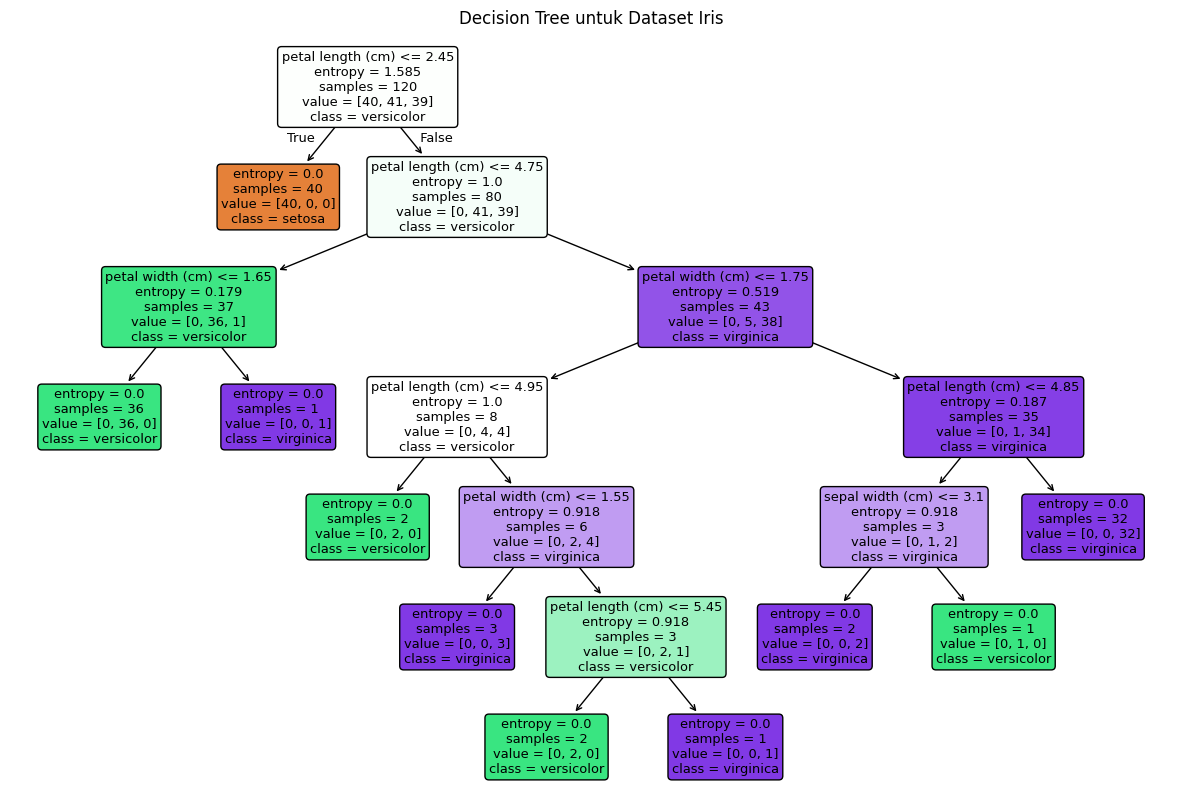

In [44]:
# visualisasi decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.title('Decision Tree untuk Dataset Iris')
plt.show()

| sepal length | sepal width | petal length | petal width |
|---|---|---|---|
| 5.1 | 3.5 | 1.4 | 0.2|
| 6.7 | 3.1 | 4.7 | 1.5|
| 7.2 | 3.6 | 6.1 | 2.5|

In [45]:
# melakukan prediksi pada data baru
new_data = np.array([
    [5.1, 3.5, 1.4, 0.2],  
    [6.7, 3.1, 4.7, 1.5],  
    [7.2, 3.6, 6.2, 2.5]   
])

# prediksi kelas untuk bunga (setosa, versicolor, virginica)
predictions = model.predict(new_data)

# menampilkan hasil prediksi
for i, pred in enumerate(predictions):
    print(f"Data ke- {i+1}: Diprediksi sebagai {iris.target_names[pred]}")




Data ke- 1: Diprediksi sebagai setosa
Data ke- 2: Diprediksi sebagai versicolor
Data ke- 3: Diprediksi sebagai virginica


d:\python\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Random Forest

In [51]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [52]:
# dataset
data = {
    'Cuaca' : ["Cerah", "Cerah", "Mendung", "Hujan", "Hujan"],
    'Suhu' : ["Panas", "Dingin", "Panas", "Dingin", "Panas"],
    'Bermain' : ["Tidak", "Tidak", "Ya", "Ya", "Ya"]
}


df = pd.DataFrame(data=data)
df

,Cuaca,Suhu,Bermain
0,Cerah,Panas,Tidak
1,Cerah,Dingin,Tidak
2,Mendung,Panas,Ya
3,Hujan,Dingin,Ya
4,Hujan,Panas,Ya


In [53]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding
le_cuaca = LabelEncoder()
le_suhu = LabelEncoder()
le_bermain = LabelEncoder()

In [54]:
df['Cuaca'] = le_cuaca.fit_transform(df['Cuaca']) #cerah=0, hujan=1, mendung=2
df['Suhu'] = le_suhu.fit_transform(df['Suhu']) #dingin=0, panas=1
df['Bermain'] = le_bermain.fit_transform(df['Bermain']) #tidak=0, ya=1

df

,Cuaca,Suhu,Bermain
0,0,1,0
1,0,0,0
2,2,1,1
3,1,0,1
4,1,1,1


In [55]:
# Memisahkan fitur dan target
x = df[['Cuaca', 'Suhu']]
y = df['Bermain']
x

,Cuaca,Suhu
0,0,1
1,0,0
2,2,1
3,1,0
4,1,1


In [58]:
# split data menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [60]:
# Membuat model dan latih

model = RandomForestClassifier(n_estimators=3, random_state=42)
# Split data menjadi training dan testing   

model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

In [63]:
# prediksi data test

test_data = pd.DataFrame({
    'Cuaca': [le_cuaca.transform(['Cerah'])[0]],  
    'Suhu': [le_suhu.transform(['Panas'])[0]]    
})
pred = model.predict(test_data)
pred = le_bermain.inverse_transform(pred)
print(f"Prediksi Bermain : {pred[0]}")  

Prediksi Bermain : Tidak
